In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('teams.csv')
df.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [3]:
df.drop(['events', 'height', 'weight', 'prev_3_medals'], axis = 1, inplace = True)
df.head()

,team,country,year,athletes,age,medals,prev_medals
0,AFG,Afghanistan,1964,8,22.0,0,0.0
1,AFG,Afghanistan,1968,5,23.2,0,0.0
2,AFG,Afghanistan,1972,8,29.0,0,0.0
3,AFG,Afghanistan,1980,11,23.6,0,0.0
4,AFG,Afghanistan,2004,5,18.6,0,0.0


In [4]:
df = df[['team', 'country', 'year', 'athletes', 'age', 'prev_medals', 'medals']]

In [5]:
df.head()

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0


In [6]:
# Need to check if the chosen columns are good for prediction.

df.corr()['medals']

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

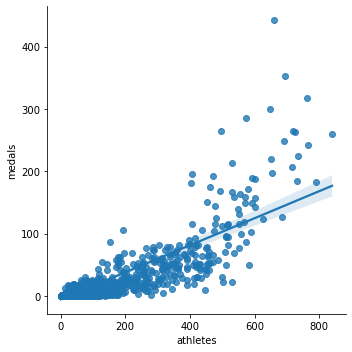

In [7]:
sns.lmplot(data = df, x = 'athletes', y = 'medals')

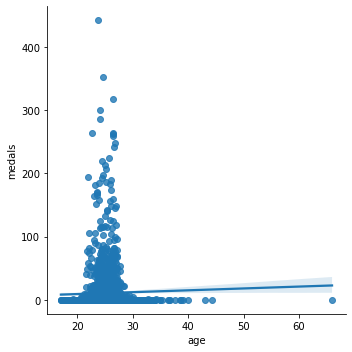

In [8]:
sns.lmplot(data = df, x = 'age', y = 'medals')

<AxesSubplot:xlabel='medals', ylabel='Count'>

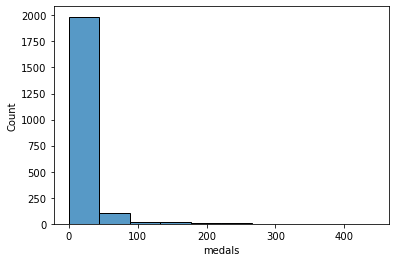

In [9]:
sns.histplot(data = df, x = 'medals', bins = 10)

<AxesSubplot:ylabel='Frequency'>

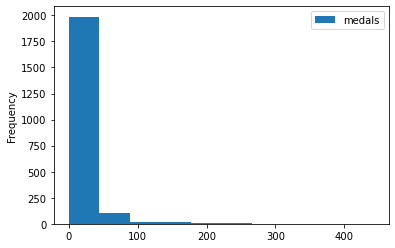

In [10]:
df.plot.hist(y = 'medals')

In [11]:
df[df.isnull().any(axis = 1)]

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


##### This means that some countries did not participate in the previous olympics. So we will have to remove them.

In [12]:
df.dropna(inplace = True)
df

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


##### Since the data is time-series data, we need to split the data properly. We need to use training data which comprises of data before 2012 and test data after 2012. In this way, we respect the order of the data and do not use future data to predict the past.

In [13]:
train = df[df['year'] < 2012].copy()
test = df[df['year'] >= 2012].copy()

In [14]:
train.shape

(1609, 7)

In [15]:
test.shape

(405, 7)

In [16]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [17]:
predictors = ['athletes', 'prev_medals']
target = 'medals'

In [18]:
reg.fit(train[predictors], train[target])

LinearRegression()

In [19]:
predictions = reg.predict(test[predictors])

In [20]:
predictions

array([-9.61221245e-01, -1.17633261e+00, -1.42503158e+00, -1.71184673e+00,
        2.15562926e+00,  3.91463636e+00, -1.71184673e+00, -1.85525431e+00,
        3.67563128e-01, -2.77770967e-01, -1.85525431e+00, -1.49673537e+00,
        4.67519911e+01,  2.87550937e+01,  4.58450091e+00,  2.54773581e+00,
       -1.85525431e+00, -1.64014295e+00, -1.85525431e+00, -1.85525431e+00,
        1.46556876e+02,  1.20571799e+02,  6.56314795e+00,  3.95275254e+00,
        7.34283247e+00,  1.03117468e+01,  5.19171882e+00,  3.58517645e+00,
       -1.64014295e+00, -1.64014295e+00, -1.56843916e+00, -1.20992022e+00,
       -1.71184673e+00, -1.42503158e+00,  1.17929959e+01,  1.00049298e+01,
       -1.78355052e+00, -1.71184673e+00, -1.56843916e+00, -1.56843916e+00,
       -1.99866189e+00, -1.99866189e+00, -1.56843916e+00, -1.35332779e+00,
       -1.92695810e+00, -1.92695810e+00,  3.28912706e+01,  2.53042547e+01,
       -1.78355052e+00, -1.28162400e+00, -1.85525431e+00, -3.87590939e-01,
        7.83480779e+01,  

In [22]:
# We can see that there are many negative values and also values in float data type.
# Countries cannot win negative medals and also fraction medals.
# So, we would be replacing negative values with zeroes and rounding them to the nearest integer.

test['predictions'] = predictions
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [23]:
test.loc[test['predictions'] < 0, 'predictions'] = 0

In [24]:
test['predictions'] = test['predictions'].round()

In [25]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test['medals'], test['predictions'])

In [26]:
error

3.2987654320987656

##### Always make sure that the MSE is less than that of the standard deviation value.
##### Otherwise, it either means that the predictors used don't give any information to predict the target or it means something is wrong with the model.

In [28]:
df.describe()['medals']

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [29]:
test[test['team'] == 'USA']

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0


##### We can see that the percentage of error is small when it comes to USA.

In [33]:
test[test['team'] == 'IND']

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0


##### When it comes to India, the prediction was not far-off when it comes to 2012. But if you see the year 2016, there was a very high variance which is not good.

In [35]:
errors = (test['medals'] - test['predictions']).abs()

In [36]:
## Error in predicting the medals by each team.

error_by_team = errors.groupby(test['team']).mean()

In [37]:
error_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

In [39]:
## Average number of medals each team won.

medals_by_team = test['medals'].groupby(test['team']).mean()

In [40]:
error_ratio = error_by_team / medals_by_team
error_ratio

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

##### We can see that there are lot of missing values (NaN). This is because error and medals are zero. If the errors are not zero, but medals are zero, we get infinite value. We need to eliminate them.

In [42]:
error_ratio[~pd.isnull(error_ratio)]

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
ZIM         inf
Length: 102, dtype: float64

In [43]:
error_ratio = error_ratio[np.isfinite(error_ratio)]

In [44]:
error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

<AxesSubplot:>

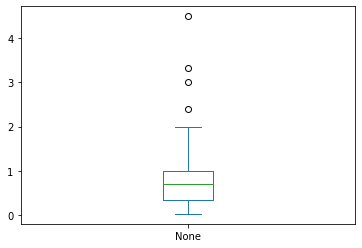

In [45]:
error_ratio.plot.box()

<AxesSubplot:ylabel='Frequency'>

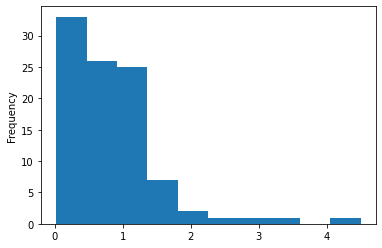

In [47]:
error_ratio.plot.hist()

##### This means that the error ratio between 0 and 0.5 corresponds to we being 50% of the actual medal count. In some cases, it is more than 2 and above which means we predicted two times more than the actual medals won by a nation.

In [48]:
error_ratio.sort_values()

team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
ITA    0.121429
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.500000
Length: 97, dtype: float64

##### So, our model works better for the countries which get more medals. The countries which do not win more medals- the error in predicting is very high.

#### Let us try with more predictors and different models to test our accuracy.

In [65]:
df1 = pd.read_csv('teams.csv')
df1.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [66]:
df1.corr()['medals']

year            -0.021603
events           0.771330
athletes         0.840817
age              0.025096
height           0.141055
weight           0.090577
medals           1.000000
prev_medals      0.920048
prev_3_medals    0.918438
Name: medals, dtype: float64

In [72]:
df1 = df1[['team', 'country', 'year', 'events', 'athletes', 'prev_medals', 'prev_3_medals', 'medals']]
df1.dropna(inplace = True)
df1

,team,country,year,events,athletes,prev_medals,prev_3_medals,medals
0,AFG,Afghanistan,1964,8,8,0.0,0.0,0
1,AFG,Afghanistan,1968,5,5,0.0,0.0,0
2,AFG,Afghanistan,1972,8,8,0.0,0.0,0
3,AFG,Afghanistan,1980,11,11,0.0,0.0,0
4,AFG,Afghanistan,2004,5,5,0.0,0.0,0
...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,0.0,0.0,0
2140,ZIM,Zimbabwe,2004,11,14,0.0,0.0,3
2141,ZIM,Zimbabwe,2008,15,16,3.0,1.0,4
2142,ZIM,Zimbabwe,2012,8,9,4.0,2.3,0


In [76]:
train1 = df1[df1['year'] < 2012].copy()
test1 = df1[df1['year'] >= 2012].copy()

In [77]:
predictors1 = ['events', 'athletes', 'prev_medals']
target1 = 'medals'

In [78]:
reg.fit(train1[predictors1], train1[target1])

LinearRegression()

In [80]:
predictions1 = reg.predict(test1[predictors1])

In [81]:
predictions1

array([ 4.14631164e-01,  9.06609940e-01, -5.27318313e-01, -2.67293075e-01,
       -3.55746506e-01, -4.42279726e-01, -2.67293075e-01,  6.06927759e-02,
        4.87557366e+00,  2.78799182e+00,  6.06927759e-02,  8.24514001e-01,
        4.36914577e+01,  3.58107287e+01,  1.20375686e-01, -2.02142934e+00,
        6.06927759e-02, -3.53395373e-02,  6.06927759e-02,  6.06927759e-02,
        1.39190630e+02,  1.21794346e+02, -3.68205037e+00, -3.72001907e+00,
       -3.39355552e+00, -1.00797975e+00,  5.88164333e+00,  4.33966660e+00,
       -4.31286000e-01, -4.31286000e-01,  1.96614000e-01, -6.23350627e-01,
       -2.67293075e-01, -5.27318313e-01,  8.95148913e+00,  5.47198712e+00,
       -1.03300149e-01, -2.67293075e-01, -1.99332463e-01, -5.95278926e-01,
        3.88678627e-01,  3.88678627e-01, -5.95278926e-01,  1.00581687e-01,
        2.24685701e-01,  2.24685701e-01,  1.98497609e+01,  1.52869285e+01,
       -1.03300149e-01, -4.59357701e-01,  6.06927759e-02,  1.87431300e+00,
        7.02439257e+01,  

In [82]:
test1['predictions'] = predictions
test1

,team,country,year,events,athletes,prev_medals,prev_3_medals,medals,predictions
6,AFG,Afghanistan,2012,6,6,1.0,0.3,1,0.414631
7,AFG,Afghanistan,2016,3,3,1.0,0.7,0,0.906610
24,ALB,Albania,2012,9,10,0.0,0.0,0,-0.527318
25,ALB,Albania,2016,6,6,0.0,0.0,0,-0.267293
37,ALG,Algeria,2012,29,39,2.0,2.3,1,-0.355747
...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,3,0.0,0.0,0,0.224686
2131,ZAM,Zambia,2012,7,7,0.0,0.0,0,-0.431286
2132,ZAM,Zambia,2016,7,7,0.0,0.0,0,-0.431286
2142,ZIM,Zimbabwe,2012,8,9,4.0,2.3,0,2.364372


In [83]:
test1.loc[test1['predictions'] < 0, 'predictions'] = 0

In [84]:
test1['predictions'] = test1['predictions'].round()

In [85]:
error1 = mean_absolute_error(test1['medals'], test1['predictions'])
error1

3.71358024691358

##### We can see that the model performed worse with more predictors than before.